In [16]:
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import numpy as np

In [17]:
with open('primitive_length.pkl', 'rb') as f:
    L = pickle.load(f)
f.close()

with open('noise_switch_frequency.pkl', 'rb') as f:
    switch_list = pickle.load(f)
f.close()
print(L)
print(switch_list)

[ 1  3  5  7  9 11 13 15 17 19 20 30 40 50 60 70 80 90]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200000000.0, 200000000.0, 200000000.0, 200000000.0, 200000000.0, 200000000.0, 200000000.0, 200000000.0, 200000000.0, 200000000.0]


F_Ciff = 1 - r =  0.7980480309783458
A =  0.5046839392476243


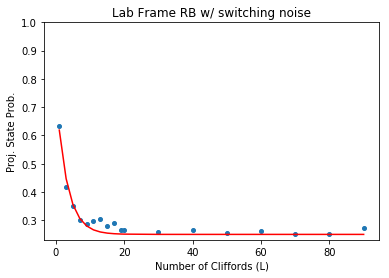

[0.6324593  0.41883825 0.35010605 0.2998964  0.2878104  0.29793055
 0.30305931 0.28115675 0.28941459 0.2637847  0.26677333 0.25894988
 0.26406088 0.25381477 0.26160332 0.25252104 0.25274862 0.27437767]
[0.3824592979456175, 0.1688382546972303, 0.10010605021306807, 0.049896395316845366, 0.037810397721530165, 0.04793054828234555, 0.053059307707153835, 0.03115675110262195, 0.039414594251103496, 0.013784700909245495, 0.016773330523418506, 0.008949877732077116, 0.014060878709997116, 0.0038147665588235125, 0.011603318871535984, 0.002521039470879727, 0.0027486216825789445, 0.02437766715895362]
F_Ciff = 1 - r =  0.9459720719329708
A =  0.6065306597126674


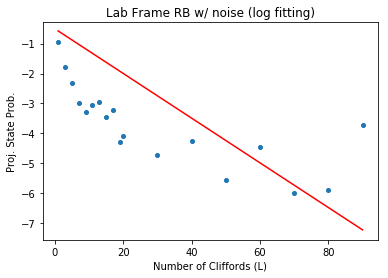

In [18]:
with open('1.pkl', 'rb') as f:
    data = pickle.load(f)
f.close()

y = data[1]
###############
# SRB with fixed B

def func(x, A, r):
    return  A * (1 - 4/3*r)**x + 0.25

popt, pcov = curve_fit(func, L, y, p0=[1, 0], bounds=(0, 1), maxfev=5000)
print("F_Ciff = 1 - r = ", 1 - popt[1])
print("A = ", popt[0])

plt.plot(L, y, 'o', markersize=4)
plt.plot(L, func(L, *popt), 'r-')
plt.ylim(top=1.0)
plt.xlabel("Number of Cliffords (L)")
plt.ylabel("Proj. State Prob.")
plt.title("Lab Frame RB w/ switching noise")
plt.show()

###############
# Fixed constant term with logarithm
# a = ln(A)
# b = ln(1 - 4/3*r)
def func(x, a, b):
    return  a + b*x

y_fit = [p - 0.25 for p in y]
print(y)
print(y_fit)
y_fit = np.log(np.absolute(y_fit))
# L = L[0:16]
# y_fit = y_fit[0:16]
popt, pcov = curve_fit(func, L, y_fit, p0=[-0.5, -0.5], bounds=[(-0.5, -0.5), (0, 0)], maxfev=5000)
r = 3/4 * (1 - np.exp(popt[1]))
print("F_Ciff = 1 - r = ", 1 - r)
print("A = ", np.exp(popt[0]))

plt.plot(L, y_fit, 'o', markersize=4)
plt.plot(L, func(L, *popt), 'r-')
plt.ylim(top=np.log(0.75))
plt.xlabel("Number of Cliffords (L)")
plt.ylabel("Proj. State Prob.")
plt.title("Lab Frame RB w/ noise (log fitting)")
plt.show()

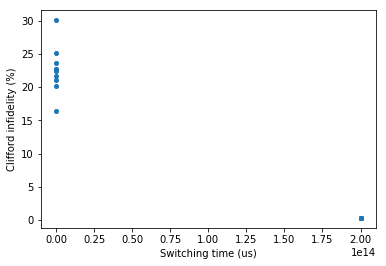

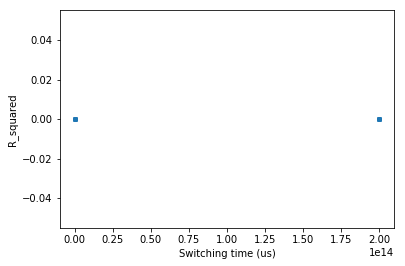

In [20]:
###############
# SRB with fixed B

def func(x, A, r):
    return  A * (1 - 4/3*r)**x + 0.25

###############
# Fixed constant term with logarithm
# a = ln(A)
# b = ln(1 - 4/3*r)
# def func(x, a, b):
#     return  a + b*x

F_Clifford = np.zeros(len(switch_list))
r_sqrd = np.zeros(len(switch_list))

for i in range(len(switch_list)):
    with open(str(i) + '.pkl', 'rb') as f:
        data = pickle.load(f)
    f.close()
    
    noise_index = data[0]
    y = data[1]
    
    ###############
    # SRB with fixed B
    popt, pcov = curve_fit(func, L, y, p0=[1, 0], bounds=(0, 1), maxfev=5000)
    F_Clifford[i] = popt[1] * 100
    
    ###############
    # Fixed constant term with logarithm
#     y_fit = [p - 0.25 for p in y]
#     y_fit = np.log(np.absolute(y_fit))
#     L = L[0:16]
#     y_fit = y_fit[0:16]
#     popt, pcov = curve_fit(func, L, y_fit, p0=[-0.5, -0.5], bounds=[(-0.5, -0.5), (0, 0)], maxfev=5000)
#     F_Clifford[i] = 3/4 * (1 - np.exp(popt[1]))
#     residuals = y_fit - func(L, *popt)
#     ss_res = np.sum(residuals**2)
#     ss_tot = np.sum((y_fit - np.mean(y_fit))**2)
#     r_sqrd[i] = 1 - (ss_res/ss_tot)

plot1 = plt.figure(1)
plt_switch_list = [x * 1000000 for x in switch_list]
plt.plot(plt_switch_list, F_Clifford, 'o', markersize=4)
plt.xlabel("Switching time (us)")
plt.ylabel("Clifford infidelity (%)")
plt.show()

plot2 = plt.figure(2)
plt_switch_list = [x * 1000000 for x in switch_list]
plt.plot(plt_switch_list, r_sqrd, 'o', markersize=4)
plt.xlabel("Switching time (us)")
plt.ylabel("R_squared")
plt.show()